In [15]:
#Importar las bibliotecas necesarias
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.covariance import MinCovDet
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [16]:
#Cargar el archivo con Pandas

# URL del archivo raw en GitHub

url = "https://raw.githubusercontent.com/iosonobenjamin/Proyecto-Data-Science/main/Airline%20Dataset.csv"

df = pd.read_csv(url)

In [17]:
# Obtener el contenido del archivo

respuesta = requests.get(url)
contenido = respuesta.content.decode('utf-8')

In [18]:
# Importar el módulo io
from io import StringIO

# Leer el contenido con pandas
df = pd.read_csv(StringIO(contenido))

**Isolation Forest**

In [19]:
# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Codificar la columna "Gender"
df["Gender"] = le.fit_transform(df["Gender"])

# Ahora "Female" se representará como 1 y "Male" co

# Codificar la columna "Flight Status"
df["Flight Status"] = le.fit_transform(df["Flight Status"])

# Ahora "On Time" se representará como 0 y "Delayed" como 1


In [20]:
# Seleccionar las columnas relevantes
columnas_interesantes = ["Passenger ID", "Gender", "Age", "Flight Status"]
df = df[columnas_interesantes]

In [21]:
# Aplicar el Isolation Forest
# Crear una instancia del Isolation Forest
clf = IsolationForest(contamination='auto', random_state=42)


In [22]:
# Crear una instancia del Isolation Forest
clf = IsolationForest(contamination='auto', random_state=42)

# Ajustar el modelo a tus datos
clf.fit(df)

# Obtiener las puntuaciones de anomalía para cada muestra
anomaly_scores = clf.decision_function(df)

# Se puede usar las puntuaciones para identificar las observaciones anómalas
# Por ejemplo, si una puntuación es negativa, es probable que sea una anomalía.

# También se puede obtener una máscara booleana para las observaciones anómalas:
outliers_mask = clf.predict(df) == -1

# Ahora se puede filtrar tus datos para obtener solo las observaciones anómalas:
observaciones_anomalas = df[outliers_mask]

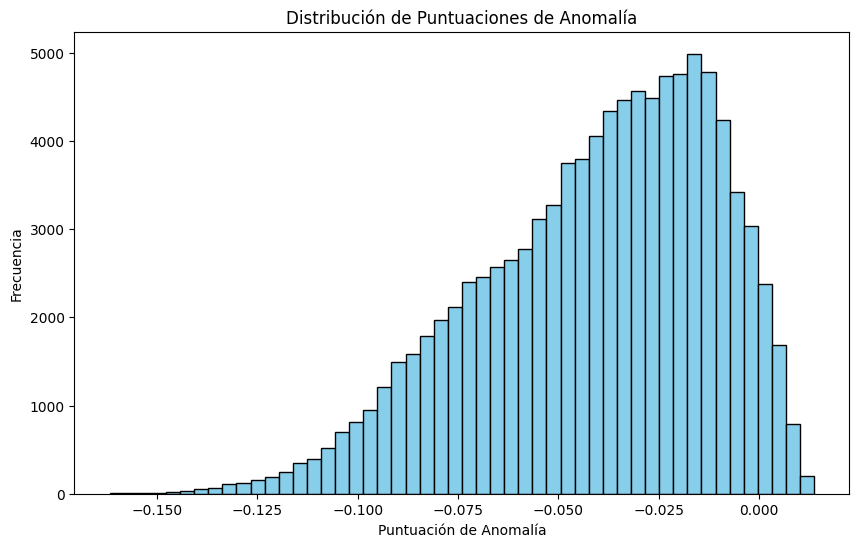

In [23]:
# Graficar las puntuaciones de anomalía
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Anomalía')
plt.show()


**Analisis**

**Histograma de Puntuaciones de Anomalía:**

El eje X representa las puntuaciones de anomalía, mientras que el eje Y representa la frecuencia de esas puntuaciones.
Los valores de las puntuaciones de anomalía están agrupados en barras en el gráfico.
La distribución de las puntuaciones parece seguir una forma similar a una campana (distribución normal), con un pico alrededor de -0.050.

**Interpretación:**

Las puntuaciones negativas indican que una muestra es más anómala.
Las puntuaciones más cercanas a cero son menos anómalas.

**Minimum Covariance Determinant (MCD)**

In [24]:
# Crear una instancia de MinCovDet
clf = MinCovDet(store_precision=True, assume_centered=False, random_state=42)

In [25]:
# Ajustar el modelo a tus datos
clf.fit(df)

MinCovDet(random_state=42)

In [26]:
#Obtener los resultados
robust_location = clf.location_
robust_covariance = clf.covariance_
mahalanobis_distances = clf.dist_

In [27]:
# Obtener las puntuaciones de Mahalanobis
mahalanobis_distances = clf.dist_

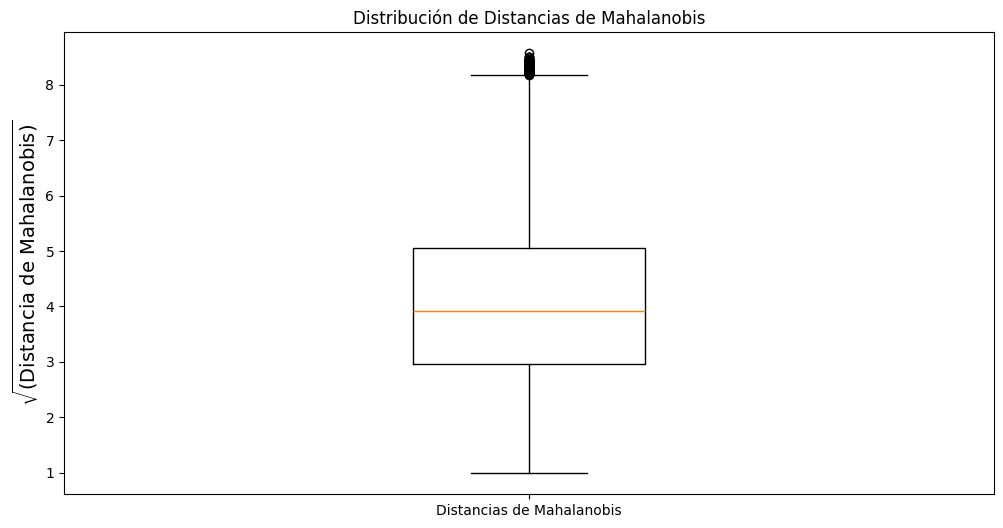

In [28]:
#Visualizar los datos
# Grafica las distancias de Mahalanobis
plt.figure(figsize=(12, 6))
plt.boxplot([mahalanobis_distances], widths=0.25)
plt.xticks([1], ['Distancias de Mahalanobis'])
plt.ylabel(r'$\sqrt{\mathrm{(Distancia\ de\ Mahalanobis)}}$', size=14)
plt.title('Distribución de Distancias de Mahalanobis')
plt.show()

Este es el diagrama de caja muestra la distribución de las distancias de Mahalanobis.                                            

La línea mediana horizontal dentro del rectángulo representa la mediana de las distancias. 

Los bigotes (líneas verticales) se extienden desde la parte superior e inferior del rectángulo, indicando la variabilidad fuera del primer y tercer cuartil. 

Los puntos fuera de estos bigotes pueden considerarse valores atípicos.

DBSCAN

In [31]:
# Revisemos las columnas disponibles en el DataFrame
print(df.columns)

Index(['Passenger ID', 'Gender', 'Age', 'Flight Status'], dtype='object')


In [32]:
# Seleccionar las columnas relevantes para el clustering (por ejemplo, Age, Airport Country Code, etc.)
X = df[['Age', 'Flight Status']]

In [33]:
# Crear un objeto DBSCAN con los parámetros adecuados
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [34]:
# Ajustar el modelo al conjunto de datos
dbscan.fit(X)

DBSCAN()

In [35]:
# Obtener las etiquetas de clúster para cada punto
labels = dbscan.labels_

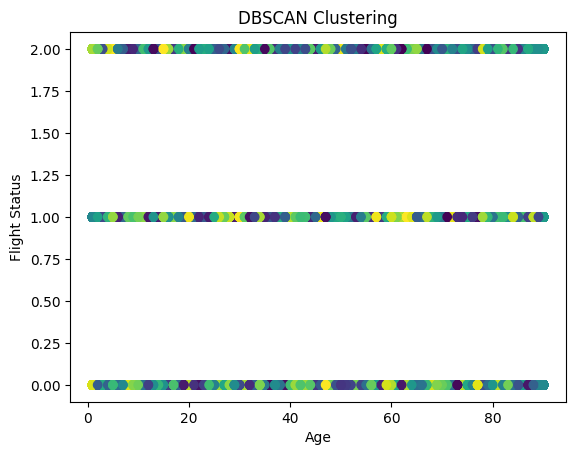

In [38]:
# Visualizar los resultados (por ejemplo, en un gráfico)
plt.scatter(X['Age'], X['Flight Status'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Flight Status')
plt.title('DBSCAN Clustering')
plt.show()

El algoritmo DBSCAN ha agrupado los datos en base a similitudes en estas dos dimensiones (edad y estado del vuelo). Los colores permiten visualizar cómo se distribuyen los datos en diferentes grupos. Por ejemplo, si hay una línea horizontal de color azul, significa que los puntos en esa línea pertenecen al mismo grupo o categoría según su edad y estado del vuelo.

Proceso de agrupamiento:
Comienza seleccionando un punto de datos aleatorio.
Si hay al menos MinPts dentro de la distancia ε, se forma un grupo alrededor de ese punto.
Luego, se expande el grupo agregando puntos vecinos que también cumplen con los criterios de densidad.
Este proceso se repite hasta que no se pueden agregar más puntos al grupo.
Los puntos que no pertenecen a ningún grupo se consideran como ruido o outliers.

Resultados en el gráfico:
Cada línea horizontal coloreada en el gráfico representa un grupo identificado por DBSCAN.
Los puntos dentro de una línea comparten similitudes en términos de edad y estado del vuelo.
Los colores distintos indican diferentes categorías o clusters.